<a href="https://colab.research.google.com/github/AndreaPardoGis/Machine.Learning/blob/main/M2U1_1_Ajuste_por_m%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple: Ajuste por mínimos cuadrados
M2U1 - Ejercicio 1

## ¿Qué vamos a hacer?
- Importar datasets en el entorno de trabajo
- Ajustar una regresión lineal simple por mínimos cuadrados de forma manual
- Resolver dicha regresión usando funciones matemáticas de Numpy
- Visualizar la regresión con Matplotlib

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Tarea 1: Importar datasets

Para este ejercicio debemos importar el siguiente datasets al entorno local, que usamos en un ejercicio anterior y estará disponibles en dicha unidad:
- [M1U1-2-dataset_tarea2.csv](https://github.com/Tokio-School/Machine-Learning/blob/main/M01-Introducci%C3%B3n_al_Machine_Learning/M1U1-Introducci%C3%B3n_al_big_data_y_ML/M1U1-2-dataset_tarea2.csv)

En función de tu entorno de trabajo, tendrás que seguir pasos diferentes para importarlo. Puedes importarlo tanto en Google Colab como en tu VM o entorno local, usando la interfaz de JupyterLab o usando las funcionalidades de tu entorno.
Como los entornos son tan diferentes, no incluimos instrucciones paso a paso para ello, pero no debes tener dificultad ninguna para hacerlo :).

Tómate este tiempo para familiarizarte con tu entorno de trabajo y descubrir las opciones para importar datasets localmente.

## Tarea 2: Ajustar la regresión lineal simple por mínimos cuadrados

Para esta tarea, vamos a ajustar la regresión paso a paso, calculando cada valor con Numpy para familiarizarnos con sus funciones.

**Nota:** Vamos a utilizar únicamente la función de suma de Numpy. En la siguiente tarea usaremos las funciones para calcular directamente la media de un array, desviaciones típicas o covarianza.

In [1]:
import numpy as np

### Importar el datasets en Numpy

Ejecuta la siguiente celda para importar el dataset com un array de Numpy, asegurándote de que el nombre del dataset es correcto y que el archivo se encuentra en el mismo directorio que el notebook.

*NOTA:* Si utilizas Google Colab, utiliza estos métodos para subir el archivo desde local o Google Drive: [External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)

In [3]:
from google.colab import files
# subir el archivo csv a google colab
uploaded = files.upload()

# Leer y procesar el archivo csv
filename = "M1U1-2-dataset_tarea2.csv"

Saving M1U1-2-dataset_tarea2.csv to M1U1-2-dataset_tarea2.csv


In [4]:
import csv

with open(filename) as csvfile:
    read_csv = list(csv.reader(csvfile))

# Eliminar cabecera
read_csv = read_csv[1:]

# Cambiar el caracter de coma decimal a puntos
for line in read_csv:
    for i in [0, 1]:
        line[i] = line[i].replace(',', '.')


# Cargar como array de Numpy
# Segun la documentacion, en versiones recientes de Numpy, np.float ha sido despreciado
# se recomienda usar np.float64 o simplemente float
dataset = np.asarray(read_csv).astype(float)

print(dataset)

[[  0.    34.64]
 [  2.    25.59]
 [  4.    28.52]
 [  6.    40.42]
 [  8.    11.12]
 [ 10.    61.2 ]
 [ 12.    44.1 ]
 [ 14.    73.33]
 [ 16.    56.14]
 [ 18.    57.83]
 [ 20.    50.74]
 [ 22.    90.15]
 [ 24.   100.63]
 [ 26.    83.65]
 [ 28.   103.47]
 [ 30.    89.48]
 [ 32.   128.12]
 [ 34.   140.35]
 [ 36.   137.97]
 [ 38.   122.06]
 [ 40.   118.24]
 [ 42.   146.39]
 [ 44.   138.15]
 [ 46.   158.85]
 [ 48.   135.65]
 [ 50.   187.84]]


Ya disponemos de los datos en un array 2D de Numpy.

Ahora, completa el código de las siguientes celdas para ajustar la regresión lineal:

In [5]:
## TODO: Crea 2 arrays 1D a partir del dataset importado que correspondan a las columnas X e Y del CSV

X = dataset[:, 0] # primera columna: esto selecciona todas las filas de la primera columna
Y = dataset[:, 1] # segunda columna: esto todas las filas de la segunda columna

# imprimir los arrays x e y
print("Array x:\n", X,"\n")
print("Array y:\n", Y)

Array x:
 [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.] 

Array y:
 [ 34.64  25.59  28.52  40.42  11.12  61.2   44.1   73.33  56.14  57.83
  50.74  90.15 100.63  83.65 103.47  89.48 128.12 140.35 137.97 122.06
 118.24 146.39 138.15 158.85 135.65 187.84]


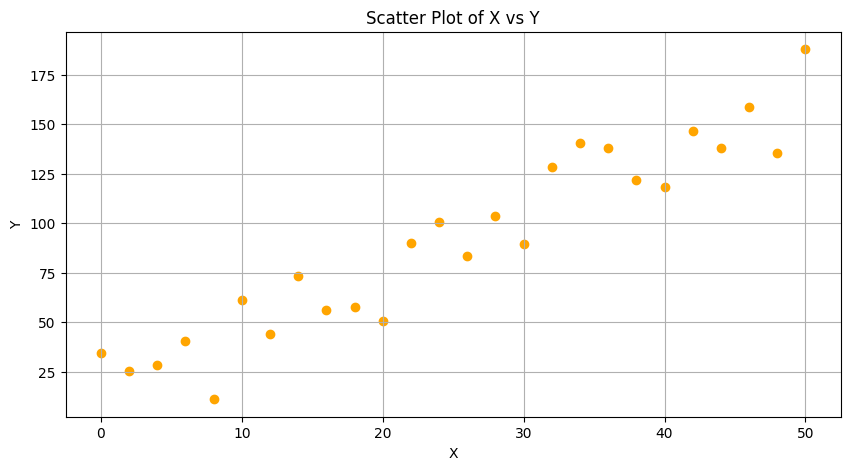

In [6]:
## TODO: Antes de entrenar el modelo, representa los datos en una gráfica de puntos de Matplotlib

import matplotlib.pyplot as plt

# Puedes usar la función scatter()
plt.figure(figsize=(10, 5)) # tamaño de la figura
plt.scatter(X, Y, color='orange', marker='o') # grafica de dispersion. personalizando color y tipo de marcador
plt.xlabel('X') # etiqueta del eje x
plt.ylabel('Y') # etiqueta del eje y
plt.title('Scatter Plot of X vs Y') # titilo del grafico
plt.grid(True) # mostrar la cuadricula para facilitar la lectura
plt.show() # mostrar la grafica

Recuerda las ecuaciones de la regresión lineal:

$$Y=m \times X + b$$

$$m=\frac{\sum XY - \frac{(\sum X)(\sum Y)}{n}}{\sum X^2-\frac{(\sum X)^2}{n}}$$

$$b=\overline{Y} - m \times \overline{X}$$

In [7]:
## TODO: Calcula m usando la función np.sum(ndarray) o ndarray.sum(), donde ndarray es el array a sumar
n = X.shape[0] # numero de elementos en x o y

# Recuerda, es una multiplicación de vectores elemento-a-elemento. Usa la función np.multiply()
# En otros ejercicios del curso usaremos np.matmul() para multiplicar matrices 2D en su lugar
XY = np.multiply(X, Y) # Producto elemento a elemento

X2 = np.square(X)   # Array X al cuadrado

# Calcular m
sum_Y = np.sum(Y) # suma de Y
sum_X = np.sum(X) # suma de x
sum_XY = np.sum(XY) # suma de XY
sum_X2 = np.sum(X2) # suma de X al cuadrado

m = (n*sum_XY - sum_X*sum_Y) / (n*sum_X2 - sum_X**2)
print("suma de Y:\n", sum_Y,"\n")
print("suma de X:\n", sum_X,"\n")
print("suma de XY:\n", sum_XY,"\n")
print("suma de X2:\n", sum_X2,"\n")

# Mostrar resultados
print("Vector XY:\n", XY,"\n")
print("Array X al cuadrado:\n", X2,"\n")
print("Valor de m:\n", m)

suma de Y:
 2364.63 

suma de X:
 650.0 

suma de XY:
 76417.23999999999 

suma de X2:
 22100.0 

Vector XY:
 [   0.     51.18  114.08  242.52   88.96  612.    529.2  1026.62  898.24
 1040.94 1014.8  1983.3  2415.12 2174.9  2897.16 2684.4  4099.84 4771.9
 4966.92 4638.28 4729.6  6148.38 6078.6  7307.1  6511.2  9392.  ] 

Array X al cuadrado:
 [   0.    4.   16.   36.   64.  100.  144.  196.  256.  324.  400.  484.
  576.  676.  784.  900. 1024. 1156. 1296. 1444. 1600. 1764. 1936. 2116.
 2304. 2500.] 

Valor de m:
 2.9575196581196566


In [8]:
## TODO: Calcula b
# TODO: Sustituye "sum_y" y "sum_x" por el código o variables correspondientes
y_avg = sum_Y / n # promedio de y
x_avg = sum_X / n # promedio de x

#numerator = np.sum((X - x_avg) * (Y - y_avg))  # Numerador de la fórmula
#denominator = np.sum((X - x_avg) ** 2)  # Denominador de la fórmula

#b = numerator / denominator  # Cálculo de b
b = y_avg - m * x_avg
print("Promedio de y:\n", y_avg,"\n")
print("Promedio de x:\n" ,x_avg,"\n")
print("b:\n", b)


Promedio de y:
 90.9473076923077 

Promedio de x:
 25.0 

b:
 17.00931623931629


Evalúa el modelo calculando su R<sup>2</sup>.

Recuerda las ecuaciones para calcular el coeficiente de correlación:

$$R^2 = \frac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y};$$

$$S_{XY} = \frac{1}{n - 1} [\sum_{i = 1}^{n}{x_i y_i - \bar{x}\bar{y}}]$$

$$\sigma_X = \sqrt{\frac{\sum X^2}{n} - \bar{X}^2};$$

$$\sigma_Y = \sqrt{\frac{\sum Y^2}{n} - \bar{Y}^2}$$

*Nota:* Utilizaremos una fórmula para la covarianza ligeramente diferente de la utilizada en ejercicios anteriores.

In [9]:
## TODO: Calcula R**2

# Calculo de Y^2
Y2 = np.square(Y)

x_std = np.sqrt((np.sum(X2) / n) - np.square(x_avg))
y_std = np.sqrt((np.sum(Y2) / n) - np.square(y_avg))
# Calcular la covarianza
cov_xy = (np.sum(XY) -n * x_avg * y_avg) / (n - 1)

# Calcular el coeficiente de correlación
r2 = cov_xy / (x_std * y_std)

print("Desviación estándar de x:\n", x_std,"\n")
print("Desviación estándar de y:\n", y_std,"\n")
print("Covarianza entre X e Y:\n", cov_xy,"\n")
print("Coeficiente de correlación:\n", r2,"\n")

Desviación estándar de x:
 15.0 

Desviación estándar de y:
 46.79410675893773 

Covarianza entre X e Y:
 692.0595999999994 

Coeficiente de correlación:
 0.9859640425309398 



Calcula las predicciones de Y como *y_pred* para los valores de X originales, con los coeficientes del modelo ajustado:

$y\_pred = m \times X + b$

In [10]:
## TODO: Calcula y_pred
y_pred = m * X + b
print("y_pred:\n", y_pred,"\n")

y_pred:
 [ 17.00931624  22.92435556  28.83939487  34.75443419  40.6694735
  46.58451282  52.49955214  58.41459145  64.32963077  70.24467009
  76.1597094   82.07474872  87.98978803  93.90482735  99.81986667
 105.73490598 111.6499453  117.56498462 123.48002393 129.39506325
 135.31010256 141.22514188 147.1401812  153.05522051 158.97025983
 164.88529915] 



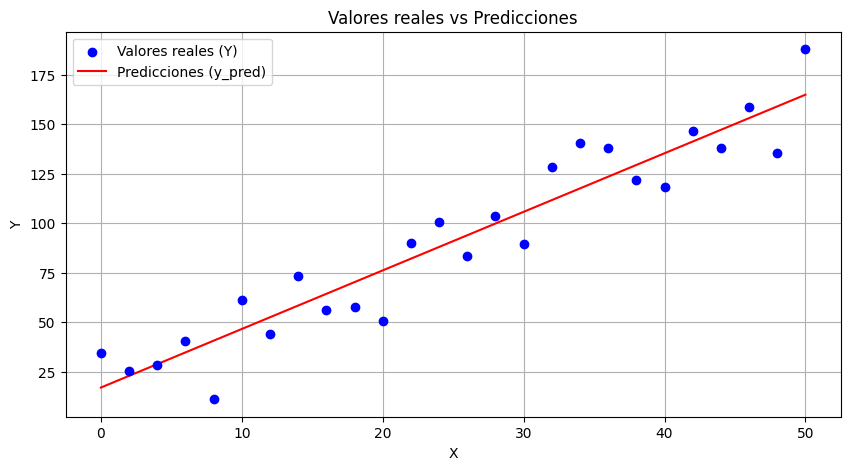

In [11]:
# TODO: Representa con Matplotlib una gráfica con 2 series en colores diferentes: Y vs X, y_pred vs X
# Usa una gráfica de puntos para Y vs X y una gráfica de líneas para y_pred vs X

# Gráfica de Matplotlib
plt.figure(figsize=(10, 5)) # tamaño de la figura
# Gráfica de puntos para los valores reales de Y vs X
plt.scatter(X, Y, color='blue', zorder=5, label='Valores reales (Y)')
# Gráfica de líneas para las predicciones y_pred vs X
plt.plot(X, y_pred, color='red', zorder=3, label='Predicciones (y_pred)')
# Añadir título y etiquetas
plt.title('Valores reales vs Predicciones')
plt.xlabel('X')
plt.ylabel('Y')
# Añadir leyenda
plt.legend()
# Mostrar la gráfica
plt.grid(True)
plt.show()

## Tarea 3: Ajustar la regresión lineal usando las funciones matemáticas de Numpy

Ahora, repite los pasos anteriores para ajustar la regresión lineal aprovechando todas las capacidades de Numpy, sus funciones para calcular las suma, media, desviación típica y covarianza de arrays.

In [13]:
## TODO: Resuelve la regresión lineal con las funciones avanzadas de Numpy
## Usa nuevos nombres de variables como np_x_avg, np_x_std, np_r2, etc.
#Ajustar la recta con polyfit(), ajuste lineal de grado 1
np_m, np_b = np.polyfit(X, Y, 1) # Esto ajusta el modelo lineal a X e Y, devolviendo la pendiente m y la interseccion b


# Calcular y_pred
np_y_pred = np_m * X + np_b # Formula de la recta ajustada

# Suma total de los cuadrados, variacion total de Y
ss_tot = np.sum((Y - np.mean(Y)) ** 2)
# Suma residual de los cuadrados, error del modelo
ss_res = np.sum((Y - np_y_pred) ** 2)
# Calcular R**2
np_r2 = 1 - (ss_res / ss_tot)

# Mostrar resultados
print("m:\n", np_m,"\n")
print("b:\n", np_b,"\n")
print("y_pred:\n", np_y_pred,"\n")
print("R**2:\n", np_r2,"\n")

m:
 2.957519658119659 

b:
 17.009316239316274 

y_pred:
 [ 17.00931624  22.92435556  28.83939487  34.75443419  40.6694735
  46.58451282  52.49955214  58.41459145  64.32963077  70.24467009
  76.1597094   82.07474872  87.98978803  93.90482735  99.81986667
 105.73490598 111.6499453  117.56498462 123.48002393 129.39506325
 135.31010256 141.22514188 147.1401812  153.05522051 158.97025983
 164.88529915] 

R**2:
 0.8987842947151942 



## Tarea 4: Calcula los residuos y realiza predicciones

Calcula los residuos de tu modelo:

$residuos = Y - Y\_pred$

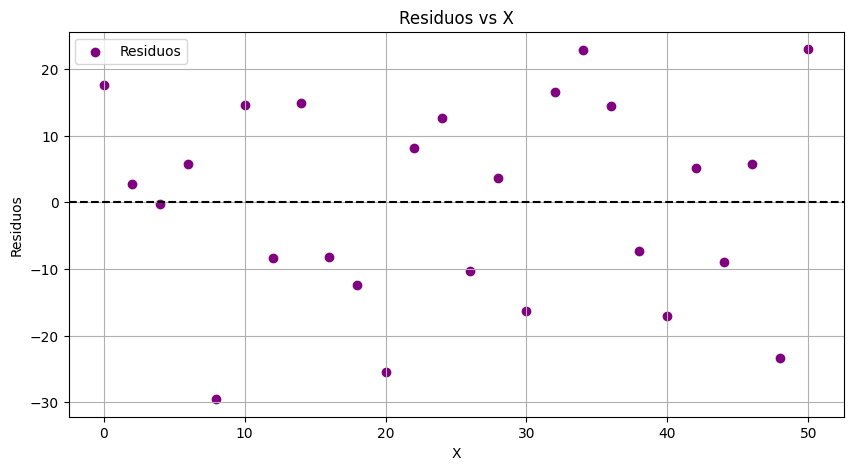

In [14]:
## TODO: Calcula los residuos y represéntalos con Matplotlib en una gráfica de puntos vs X

res = Y - np_y_pred

# Gráfica de Matplotlib
plt.figure(figsize=(10, 5)) #tamaño de la grafica
plt.scatter(X, res, color='purple', label='Residuos') #grafica de puntos para los residuos
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuos vs X')
plt.xlabel('X')
plt.ylabel('Residuos')
plt.legend()
plt.grid(True)
plt.show()

Realiza predicciones para 2 (o más) valores nuevos de X, 1 valor para interpolación y 1 valor para extrapolación.

In [16]:
# TODO: Realiza predicciones con el modelo ajustado

x_interpol = np.linspace(min(X), max(X), 100) # valores dentro del rango de x
y_interpol = np_m * x_interpol + np_b # valores de interpolacion

x_extrapol = np.array([min(X)-5, max(X)+5]) # valores fuera del rango de x (extrapolación)
y_extrapol = np_m * x_extrapol + np_b # predicciones de extrapolacion

print("Predicciones de interpolación:\n", y_interpol,"\n")
print("Predicciones de extrapolación:\n", y_extrapol)

Predicciones de interpolación:
 [ 17.00931624  18.50301304  19.99670983  21.49040663  22.98410343
  24.47780022  25.97149702  27.46519382  28.95889062  30.45258741
  31.94628421  33.43998101  34.9336778   36.4273746   37.9210714
  39.41476819  40.90846499  42.40216179  43.89585859  45.38955538
  46.88325218  48.37694898  49.87064577  51.36434257  52.85803937
  54.35173617  55.84543296  57.33912976  58.83282656  60.32652335
  61.82022015  63.31391695  64.80761374  66.30131054  67.79500734
  69.28870414  70.78240093  72.27609773  73.76979453  75.26349132
  76.75718812  78.25088492  79.74458171  81.23827851  82.73197531
  84.22567211  85.7193689   87.2130657   88.7067625   90.20045929
  91.69415609  93.18785289  94.68154968  96.17524648  97.66894328
  99.16264008 100.65633687 102.15003367 103.64373047 105.13742726
 106.63112406 108.12482086 109.61851766 111.11221445 112.60591125
 114.09960805 115.59330484 117.08700164 118.58069844 120.07439523
 121.56809203 123.06178883 124.55548563 126.0

Representa gráficamente las predicciones sobre los valores de entrenamiento

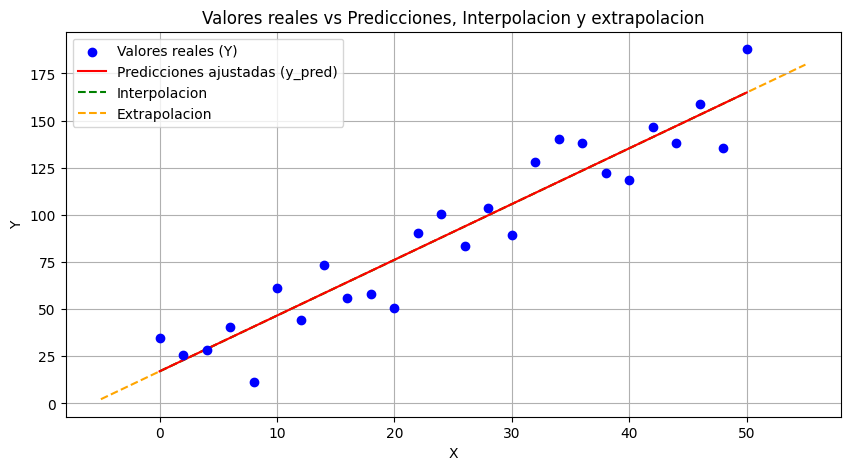

In [19]:
# TODO: Representa las predicciones como puntos de una serie diferente sobre la nube de puntos Y vs X de entrenamiento
plt.figure(figsize=(10, 5)) #tamaño de la grafica
plt.scatter(X, Y, color='blue', label='Valores reales (Y)', zorder=5) #grafica de puntos para los residuos
plt.plot(X, np_y_pred, color='red', label='Predicciones ajustadas (y_pred)', zorder=3)

# Añadimos las predicciones de la interpolacion
plt.plot(x_interpol, y_interpol, color='green', linestyle='--', label='Interpolacion', zorder=2)
# Predicciones de extrapolacion
plt.plot(x_extrapol, y_extrapol, color='orange', linestyle='--', label='Extrapolacion', zorder=1)

plt.title('Valores reales vs Predicciones, Interpolacion y extrapolacion')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Tarea 5: Resolución con Scikit-learn

*¿Te atreves a resolver una regresión lineal simple usando Scikit-learn? ¿Y a evalularla y realizar predicciones?*

Revisa el código de este notebook y adáptalo para usar nuestros datos: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Pendiente (m): [2.95751966]
Interseccion (b): [17.00931624]
R^2: 0.8987842947151942


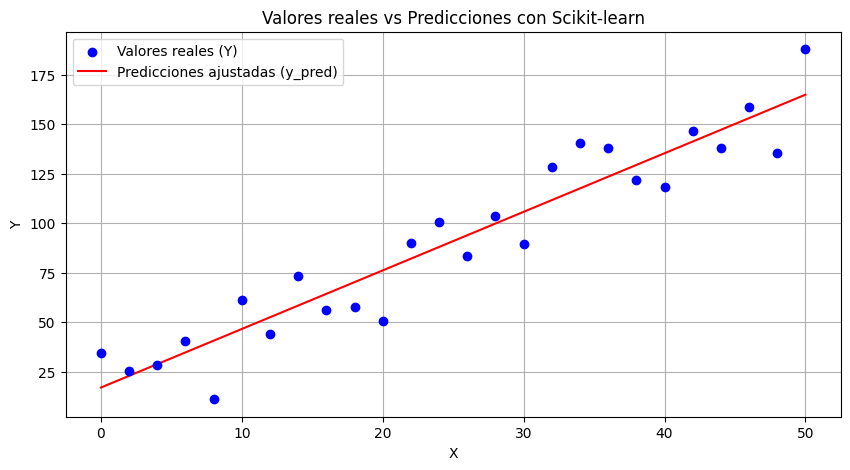

In [27]:
# TODO: Resuelve la regresión lineal simple usando Scikit-learn a partir de dicho ejemplo
# Primero importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Usamos los datos que ya estan cargados y definidos como arrays de X e Y
# Creamos el modelo de regresion lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X, Y)

# Hacemos predicciones
y_pred_sklearn = model.predict(X)

# Evaluamos el modelo
m_sklearn = model.coef_[0] #pendiente m
b_sklearn = model.intercept_ #interseccion b

# Evaluamos el modelo usando el coeficiente de correlación R^2
r2_sklearn = r2_score(Y, y_pred_sklearn)

# Mostramos los resultados
print("Pendiente (m):", m_sklearn)
print("Interseccion (b):", b_sklearn)
print("R^2:", r2_sklearn)

# Representar los resultados gráficamente
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', label='Valores reales (Y)', zorder=5)
plt.plot(X, y_pred_sklearn, color='red', label='Predicciones ajustadas (y_pred)', zorder=3)

plt.title('Valores reales vs Predicciones con Scikit-learn')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()